## Importing Libraries

In [1]:
import warnings #to ignore any warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/fertilizers-by-product-fao/FertilizersProduct.csv


## Reading and Inspecting Data

In [3]:
df = pd.read_csv('/kaggle/input/fertilizers-by-product-fao/FertilizersProduct.csv',encoding = "ISO-8859-1", header = 0, sep = ",")
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


In [4]:
df.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
164463,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2004,2004,tonnes,5.00,Fb
164464,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2008,2008,tonnes,2.13,Fb
164465,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2009,2009,tonnes,9.00,Fb
164466,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2010,2010,tonnes,4971.00,Fb
164467,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2011,2011,tonnes,7.00,Fb


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164468 entries, 0 to 164467
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area Code     164468 non-null  int64  
 1   Area          164468 non-null  object 
 2   Item Code     164468 non-null  int64  
 3   Item          164468 non-null  object 
 4   Element Code  164468 non-null  int64  
 5   Element       164468 non-null  object 
 6   Year Code     164468 non-null  int64  
 7   Year          164468 non-null  int64  
 8   Unit          164468 non-null  object 
 9   Value         164468 non-null  float64
 10  Flag          164468 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 13.8+ MB


From above we can see that there are no null values in the dataframe. We can also see that all the columns are of the correct datatype

To have consistency in the column names, I'll change all the column names to the format : firstName_lastName

In [6]:
df.columns  = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.head()

,area_code,area,item_code,item,element_code,element,year_code,year,unit,value,flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R


Removing irrelevant columns i.e. the columns that are not needed for the analysis like: area_code, item_code, element_code, year_code and flag

In [7]:
df.drop(['area_code','item_code','element_code','year_code','flag'], axis = 1, inplace = True)
df.head()

,area,item,element,year,unit,value
0,Afghanistan,"Ammonia, anhydrous",Import Quantity,2011,tonnes,4.49
1,Afghanistan,"Ammonia, anhydrous",Import Quantity,2014,tonnes,2.00
2,Afghanistan,"Ammonia, anhydrous",Import Quantity,2017,tonnes,2.07
3,Afghanistan,"Ammonia, anhydrous",Import Value,2011,1000 US$,2.69
4,Afghanistan,"Ammonia, anhydrous",Import Value,2014,1000 US$,1.07


Checking for any duplicates

In [8]:
df.duplicated().any()

False

## EDA

### Elements in the dataset

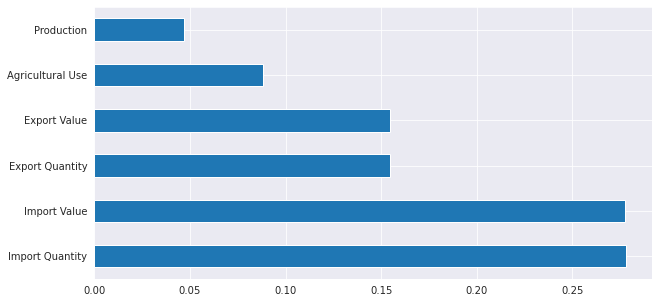

In [9]:
df["element"].value_counts(normalize = True).plot(kind = "barh", figsize = (10,5))
plt.show()

From above we can see that overall, the import quantity by countries is the most compared to what they produce, use and export.

### Top 10 Countries with most Fertilizer used

In [10]:
df1 = df.area.value_counts().head(10).reset_index()
df1 = df1.rename(columns = {'index':'Countries','area':'No. of Fertilizers'})
fig = px.bar(df1, x = 'No. of Fertilizers', y= 'Countries', orientation='h', title = 'Top 10 Countries with Most Fertilizers used')
fig.show()

We can see the Top 10 countries above that deal with fertilizers i.e. either producing, exporting, importing or using them. India is the Top 9th Country to do so.

Will look at each use for top 10 countries in detail.

### Top 10 Countries - Export

In [11]:
df_exp = df[df["element"] == "Export Quantity"]

df_exp = df_exp.area.value_counts().head(10).reset_index()
df_exp = df_exp.rename(columns = {'index':'Countries','area':'No. of Fertilizers'})
fig = px.bar(df_exp, x = 'No. of Fertilizers', y= 'Countries', orientation='h', title = 'Top 10 Countries with Most Fertilizers exported')
fig.show()

India is not one of the Top 10 Countries to export fertilizers. United States of America, Spain, and Canada are in Top 10 countries to export, and they are in the top 10 countries for overall fertilizers used as well.

### Top 10 Countries - Import

In [12]:
df_imp = df[df["element"] == "Import Quantity"]

df_imp = df_imp.area.value_counts().head(10).reset_index()
df_imp = df_imp.rename(columns = {'index':'Countries','area':'No. of Fertilizers'})
fig = px.bar(df_imp, x = 'No. of Fertilizers', y= 'Countries', orientation='h', title = 'Top 10 Countries with Most Fertilizers imported')
fig.show()

India is not one of the Top 10 Countries to import fertilizers. Denmark, Canda, United States of America, and Spain are in Top 10 countries to import, and they are in the top 10 countries for overall fertilizers used as well.

### Top 10 Countries - Agricultural Use

In [13]:
df_agr = df[df["element"] == "Agricultural Use"]

df_agr = df_agr.area.value_counts().head(10).reset_index()
df_agr = df_agr.rename(columns = {'index':'Countries','area':'No. of Fertilizers'})
fig = px.bar(df_agr, x = 'No. of Fertilizers', y= 'Countries', orientation='h', title = 'Top 10 Countries with Most Fertilizers used agriculturally')
fig.show()

India is not one of the Top 10 Countries to use fertilizers agriculturally. Slovenia, Brazil, and Sweden are in Top 10 countries for agriculture use, and they are in the top 10 countries for overall fertilizers used as well.

### Top 10 Countries - Production Use

In [14]:
df_prod = df[df["element"] == "Production"]

df_prod = df_prod.area.value_counts().head(10).reset_index()
df_prod = df_prod.rename(columns = {'index':'Countries','area':'No. of Fertilizers'})
fig = px.bar(df_prod, x = 'No. of Fertilizers', y= 'Countries', orientation='h', title = 'Top 10 Countries with Most Fertilizers Produced')
fig.show()

India is not one of the Top 10 Countries to produce fertilizers. Brazil, Denmark, Slovenia, and Poland are in Top 10 countries for production, and they are in the top 10 countries for overall fertilizers used as well.

### Analysing Indian Market

In [15]:
India = df[df.area == 'India'] # creating a new dataframe where the area is India
India.drop("area", axis = 1, inplace = True) # since we just have a single area, having an area column is no longer required
India.head()

,item,element,year,unit,value
65372,"Ammonia, anhydrous",Import Quantity,2002,tonnes,1279348.13
65373,"Ammonia, anhydrous",Import Quantity,2003,tonnes,979985.94
65374,"Ammonia, anhydrous",Import Quantity,2004,tonnes,1189895.82
65375,"Ammonia, anhydrous",Import Quantity,2005,tonnes,1731417.05
65376,"Ammonia, anhydrous",Import Quantity,2006,tonnes,1781431.57


In [16]:
India.shape

(1514, 5)

#### Different Uses for Each Fertilizer in India

Looking at how each fertilizer is being used i.e. how much a certain fertilizer is being used for Production, Agricultural use etc.

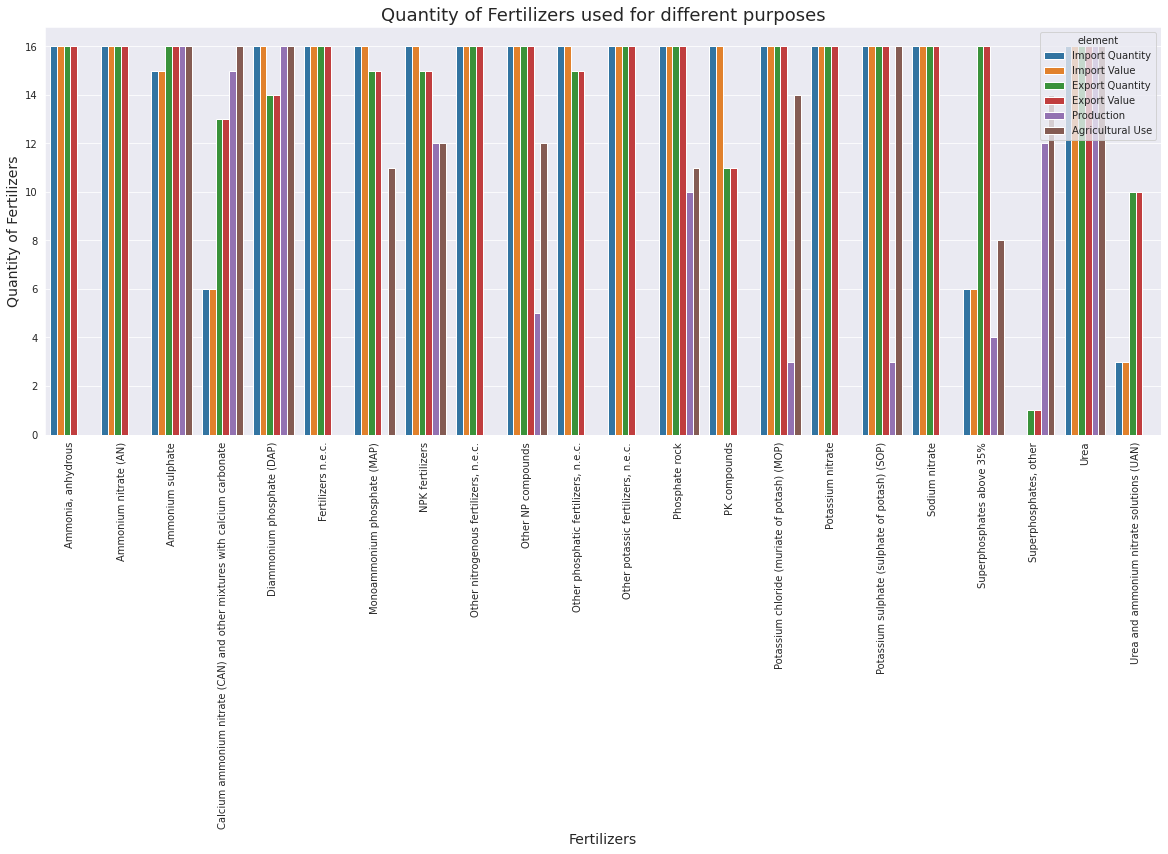

In [17]:
plt.figure(figsize=(20,7.5))
sns.countplot(x = 'item', data=India, hue = 'element')
plt.title("Quantity of Fertilizers used for different purposes", size = 18)
plt.xlabel("Fertilizers", size = 14)
plt.ylabel("Quantity of Fertilizers", size = 14)

plt.xticks(rotation = 90)
plt.show()


As we can see from the above graph, majority of our fertilizers are being used for export and import, more for export purposes.


**Now we will analyse Production, Trade (export and import) and Aglicuture use of Fertilizers in India in detail**

### Fertilizers in India for Production Use over the years

In [18]:
df_prod = India[India.element == 'Production'] # creating a new dataframe which contains data of only Production use in India


fig = px.area(df_prod, x = 'year', y = 'value', color = 'item',title = 'Fertilizers produced over the years 2002-2017 in India', line_group = 'item')
fig.update_layout(legend_orientation = 'h',height = 600)
fig.show()

From the above graph we can see that Urea's production in India was the highest but only until 2016. It dropped drastically after 2016.


### Fertilizers in India for Agriculural Use over the years

In [19]:
df_agr = India[India.element == 'Agricultural Use'] # creating a new dataframe which contains data of only Agricultural use in India


fig = px.area(df_agr, x = 'year', y = 'value', color = 'item',title = 'Fertilizers used over the years 2002-2017 in India', line_group = 'item')
fig.update_layout(legend_orientation = 'h',height = 600)

fig.show()

From the above we can see that Urea is the most used fertilizer for agriculture. It should not be too shocking since it was the most produced fertilizer in India as well. But from above we can also see that Urea is being used more than its being produced. So does India import and export Urea the most as well? 

### Trade - Export Quantity

Looking at Top 10 fertilizers that are being exported from India

In [20]:
#getting all the data where element is export quantity
df_equan = India[India.element == 'Export Quantity']

#getting top 10 fertilizers that were exported
top_10_exp = df_equan.groupby('item')['value'].sum().sort_values(ascending = False).head(10).reset_index()
fig = px.bar(top_10_exp, x = 'value', y = 'item', orientation = 'h', title = 'Top 10 Fertilizers Exported')
fig.show()


NPK fertlizers were exported the most.

We can also see that even though India produces Urea in high quantities, it doesn't export much.

In [21]:

#list to store the dataframes created for top 10 fertilizers
df_to_concat = []

for i in top_10_exp['item']:
    items = df_equan[df_equan.item == i]
    df_to_concat.append(items)
    
result = pd.concat(df_to_concat)

#plotting line graph
fig_equan = px.line(result, x = 'year', y = 'value', color = 'item', title = 'Top 10 Fertilizers exported from 2002-2017')
fig_equan.update_layout(legend_orientation = 'h', height= 600)
fig_equan.show()


Above we can see that NPK fertilizers were either not getting exported or were being exported in very less quantity until 2008 and then by 2009 it became the most exported fertilizer. Even though it went down in 2010, the quantity increased steadily after that. A pattern has not been recognised by looking at the Top 10 Fertilizers that were exported from 2002-2017

### Trade - Import Quantity

Looking at Top 10 fertilizers that are being exported from India

In [22]:
df_iquan = India[India.element == 'Import Quantity']

#getting top 10 fertilizers that were imported
top_10_imp = df_iquan.groupby('item')['value'].sum().sort_values(ascending = False).head(10).reset_index()
fig = px.bar(top_10_imp, x = 'value', y = 'item', orientation = 'h', title = 'Top 10 Fertilizers Imported')
fig.show()

Phosphate rock is imported the most and after that Urea is imported the most. We had already established earlier that Urea was being used more than it was being produced, so it had to be imported in large quantities as well, which it is.

In [23]:

#list to store the dataframes created for top 10 fertilizers
df_to_concat = []

for i in top_10_imp['item']:
    items = df_iquan[df_iquan.item == i]
    df_to_concat.append(items)
    
result = pd.concat(df_to_concat)

#plotting line graph
fig_equan = px.line(result, x = 'year', y = 'value', color = 'item', title = 'Top 10 Fertilizers imported from 2002-2017')
fig_equan.update_layout(legend_orientation = 'h', height = 600)
fig_equan.show()


Over the years, India has increased the import of Phospate Rock and Urea. In 2008 and 2009, Diammonium Phosphate was being imported the most, but after that it has remained more or less constant.

## How has India been using fertilizers?

1. India is not in Top 10 Countries list for each use separately, but India is the 9th top country for fertilizer use overall.
2. We observed that **Urea** in India is the most produced fertilizer, but only until 2016. After the production of Urea decreased after 2016, Urea was getting imported in large ammounts. 
4. **NPK fertilizers** is the most exported fertilizer 
3. **Urea** is the most used fertilizer for agriculture in India.
4. India produces, uses and imports fertilizers in large quantities, but the amount of fertilizers exported compared to other uses is very low. 